## Re-eval 1 13th May 2023
### 21BAI1533 Zeel Mehta 

### 21BAI1533
### 1) Import the necessary packages /modules and read the data set


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df=pd.read_csv('data.csv')

In [107]:
df

,Unnamed: 0,ride.alc.driver,female,grade,age4,smoke,DriverLicense,In_Month
0,1,1,1.0,10.0,15.0,1.0,0.0,39343.0
1,2,1,1.0,10.0,18.0,1.0,1.0,46205.0
2,3,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,0.0,11.0,17.0,0.0,1.0,43525.0
4,5,0,0.0,11.0,17.0,0.0,1.0,39891.0
...,...,...,...,...,...,...,...,...
13382,13383,0,NaN,9.0,15.0,0.0,0.0,216303.0
13383,13384,0,NaN,9.0,15.0,0.0,0.0,216379.0
13384,13385,0,NaN,9.0,15.0,0.0,0.0,216455.0
13385,13386,0,NaN,9.0,15.0,0.0,0.0,216530.0


### 21BAI1533
### 2) Drop the column ‘Unnamed: 0’ and rename the columns as given below [hint: rename] (2 Marks).


In [108]:
df.columns

Index(['Unnamed: 0', 'ride.alc.driver', 'female', 'grade', 'age4', 'smoke',
       'DriverLicense', 'In_Month'],
      dtype='object')

In [109]:
df=df.drop(['Unnamed: 0'],axis=1)
df=df.rename(columns={'ride.alc.driver':'drunken','age4':'age','smoke':'smoked','DriverLicense':'driver_license','In_Month':'Income'})

In [110]:
df

,drunken,female,grade,age,smoked,driver_license,Income
0,1,1.0,10.0,15.0,1.0,0.0,39343.0
1,1,1.0,10.0,18.0,1.0,1.0,46205.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0.0,11.0,17.0,0.0,1.0,43525.0
4,0,0.0,11.0,17.0,0.0,1.0,39891.0
...,...,...,...,...,...,...,...
13382,0,NaN,9.0,15.0,0.0,0.0,216303.0
13383,0,NaN,9.0,15.0,0.0,0.0,216379.0
13384,0,NaN,9.0,15.0,0.0,0.0,216455.0
13385,0,NaN,9.0,15.0,0.0,0.0,216530.0


### 21BAI1533
### 3) Fill in the missing values using the proper strategy for the columns identified from question number 2. (2 Marks)

In [111]:
df.columns

Index(['drunken', 'female', 'grade', 'age', 'smoked', 'driver_license',
       'Income'],
      dtype='object')

In [112]:
df.dtypes

drunken             int64
female            float64
grade             float64
age               float64
smoked            float64
driver_license    float64
Income            float64
dtype: object

In [113]:
df['female'].isnull().values.sum()

755

In [114]:
df['drunken'].isnull().values.sum()

0

In [115]:
df['grade'].isnull().values.sum()

67

In [116]:
df['age'].isnull().values.sum()

54

In [117]:
df['smoked'].isnull().values.sum()

388

In [118]:
df['driver_license'].isnull().values.sum()

54

In [119]:
df['Income'].isnull().values.sum()

8

In [120]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

In [121]:
df[['female','grade','age','smoked','driver_license','Income']]=imp.fit_transform(df[['female','grade','age','smoked','driver_license','Income']])

In [122]:
df

,drunken,female,grade,age,smoked,driver_license,Income
0,1,1.0,10.0,15.0,1.0,0.0,39343.0
1,1,1.0,10.0,18.0,1.0,1.0,46205.0
2,1,1.0,12.0,16.0,1.0,1.0,39343.0
3,0,0.0,11.0,17.0,0.0,1.0,43525.0
4,0,0.0,11.0,17.0,0.0,1.0,39891.0
...,...,...,...,...,...,...,...
13382,0,1.0,9.0,15.0,0.0,0.0,216303.0
13383,0,1.0,9.0,15.0,0.0,0.0,216379.0
13384,0,1.0,9.0,15.0,0.0,0.0,216455.0
13385,0,1.0,9.0,15.0,0.0,0.0,216530.0


In [123]:
df.isnull().values.sum()

0

### 21BAI1533 
### 4) Visualize the “female” using pie chart with labels. (2 Marks)


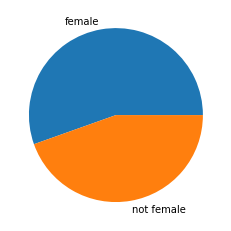

In [124]:
x=df['female'].value_counts()
label=['female','not female']
plt.pie(x,labels=label)
plt.show()

### 21BAI1533
### 5) Draw the drunken driver details in bar chart [x axis: No and Yes & Y axis: Count]. (2 Marks)


In [133]:
x=df['drunken'].value_counts()
x

0    9210
1    4177
Name: drunken, dtype: int64

In [126]:
y=df['drunken']

<AxesSubplot:xlabel='drunken', ylabel='drunken'>

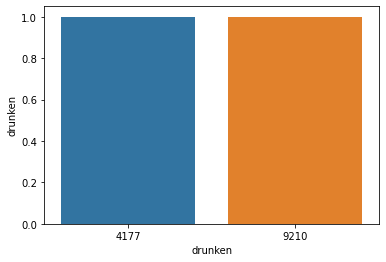

In [127]:
sns.barplot(x=x,y=y,data=df)

### 21BAI1533
### 6) Apply normalization on the column “Income” and add the normalized values into the new column called “IncomeV1” (2 Marks).


In [128]:
df['Income']=df['Income'].astype(int)

In [129]:
mi=df['Income'].min()
ma=df['Income'].max()

In [130]:
p=df['Income']-mi
q=ma-mi

In [131]:
df['IncomeV1']=p/q

In [132]:
df

,drunken,female,grade,age,smoked,driver_license,Income,IncomeV1
0,1,1.0,10.0,15.0,1.0,0.0,39343,0.005092
1,1,1.0,10.0,18.0,1.0,1.0,46205,0.026767
2,1,1.0,12.0,16.0,1.0,1.0,39343,0.005092
3,0,0.0,11.0,17.0,0.0,1.0,43525,0.018302
4,0,0.0,11.0,17.0,0.0,1.0,39891,0.006823
...,...,...,...,...,...,...,...,...
13382,0,1.0,9.0,15.0,0.0,0.0,216303,0.564068
13383,0,1.0,9.0,15.0,0.0,0.0,216379,0.564308
13384,0,1.0,9.0,15.0,0.0,0.0,216455,0.564548
13385,0,1.0,9.0,15.0,0.0,0.0,216530,0.564785
